In [15]:
import os

In [16]:
os.getcwd()

'/content'

In [17]:
os.listdir()

['.config', 'car.png', 'cat.jpg', 'sample_data']

In [18]:
img_path1 = 'car.png'
img_path2 = 'cat.jpg'

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [20]:
car= mpimg.imread(img_path1)
cat= mpimg.imread(img_path2)

In [21]:
car.shape

(910, 1600, 4)

In [22]:
cat.shape

(800, 1280, 3)

In [23]:
type(car)

numpy.ndarray

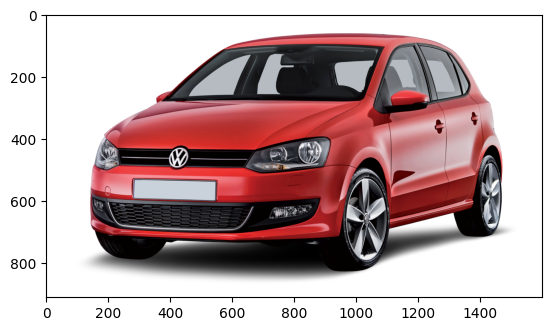

In [24]:
plt.imshow(car)

In [14]:
car[0]

array([[1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       ...,
       [1., 1., 1., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 0.]], dtype=float32)

In [11]:
car[0][0]

array([1., 1., 1., 0.], dtype=float32)

Matplotlib read as **RGB**

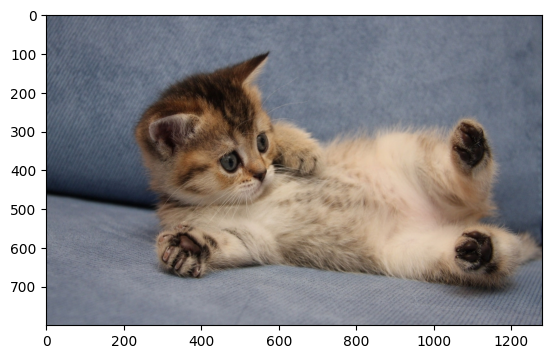

In [25]:
plt.imshow(cat)

In [26]:
cat[0]

array([[ 70,  82,  98],
       [ 77,  88, 106],
       [ 82,  95, 114],
       ...,
       [ 84,  93, 110],
       [ 85,  94, 111],
       [ 83,  92, 109]], dtype=uint8)

In [27]:
cat[0][0]

array([70, 82, 98], dtype=uint8)

cv2 reads as **BGR**

In [28]:
cat_cv2 = cv2.imread(img_path2)

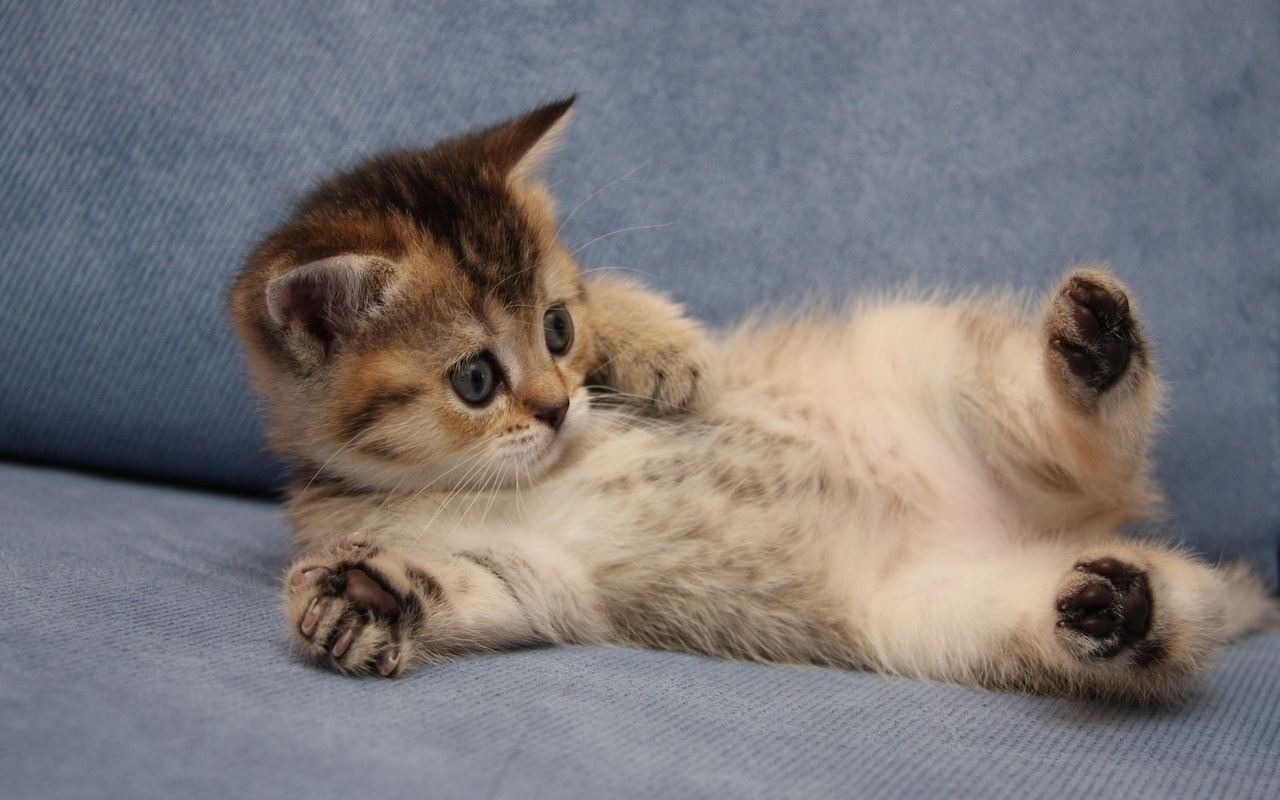

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(cat_cv2)

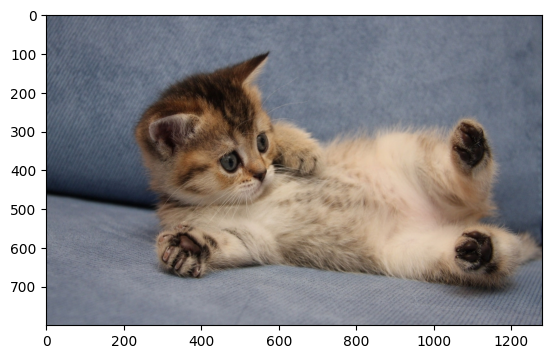

In [30]:
## BGR to RGB
cat_cv2_BGR_RGB = cv2.cvtColor(cat_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(cat_cv2_BGR_RGB)

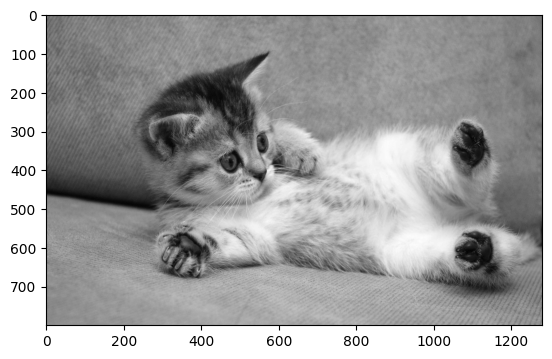

In [31]:
cat_cv2_BGR_GRAY = cv2.cvtColor(cat_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(cat_cv2_BGR_GRAY, cmap="gray")

In [32]:
cat_cv2_BGR_GRAY.shape

(800, 1280)

In [33]:
cat_cv2_BGR_GRAY.min(), cat_cv2_BGR_GRAY.max()

(0, 216)

# understanding composition of colored images

In [34]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)

  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel

  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)

  # plotting the actual image and RGB images
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


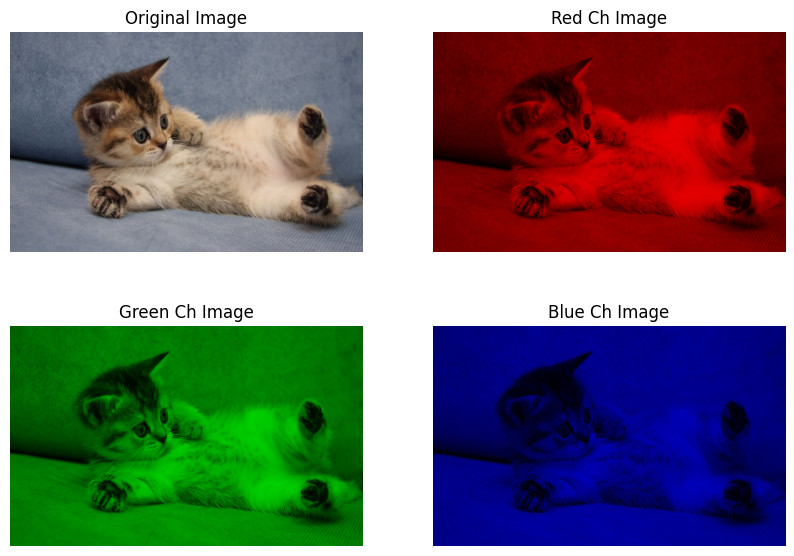

In [35]:
viusalize_RGB_channel(imgArray=cat_cv2)

In [36]:
random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

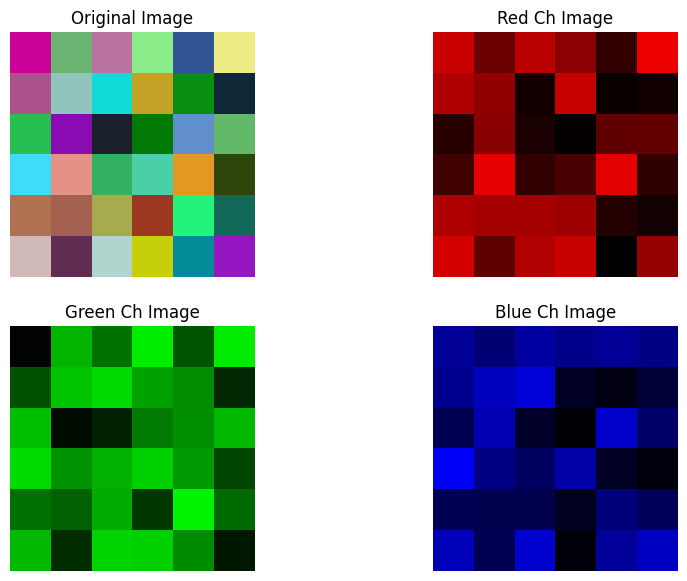

In [37]:
viusalize_RGB_channel(imgArray=random_colored_img)

In [38]:
random_colored_img

array([[[150,   3, 201],
        [115, 180, 107],
        [160, 114, 186],
        [138, 237, 139],
        [151,  84,  49],
        [132, 235, 237]],

       [[142,  82, 174],
        [189, 196, 144],
        [215, 218,  18],
        [ 38, 162, 196],
        [ 18, 142,   9],
        [ 56,  39,  16]],

       [[ 82, 191,  40],
        [179,  12, 137],
        [ 43,  33,  27],
        [  6, 122,   4],
        [203, 143,  96],
        [105, 184,  98]],

       [[247, 220,  63],
        [132, 146, 228],
        [ 97, 177,  50],
        [168, 207,  75],
        [ 36, 152, 227],
        [ 12,  70,  46]],

       [[ 82, 113, 174],
        [ 79,  97, 165],
        [ 77, 171, 166],
        [ 32,  56, 156],
        [123, 243,  36],
        [ 89, 105,  19]],

       [[185, 185, 210],
        [ 81,  44,  97],
        [206, 212, 177],
        [ 11, 207, 199],
        [152, 140,   1],
        [194,  23, 149]]])

# understanding filters

In [39]:
sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [40]:
print("highlighting Horizontal edges:\n", sobel.T)


highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [41]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

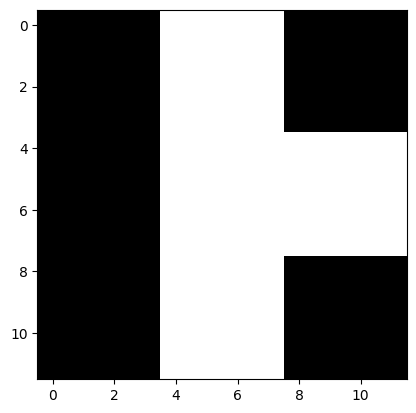

In [42]:
plt.imshow(example1, cmap="gray")

In [43]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3

  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)

  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  return resulant_image

In [44]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [45]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [46]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [47]:
sum(sum(target_area*sobel))

-1020

In [48]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

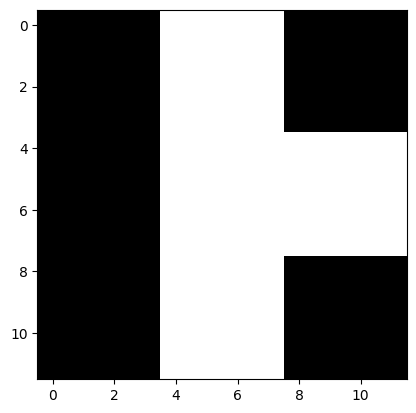

In [49]:
## original
plt.imshow(example1, cmap="gray")

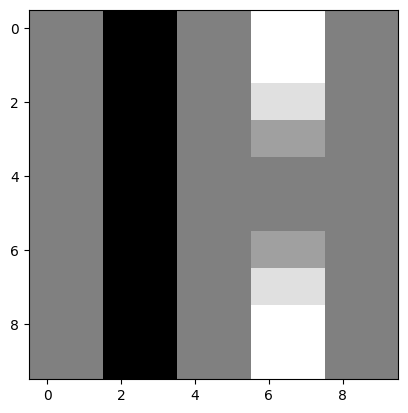

In [50]:
## after filter --> sobel
plt.imshow(result, cmap="gray")

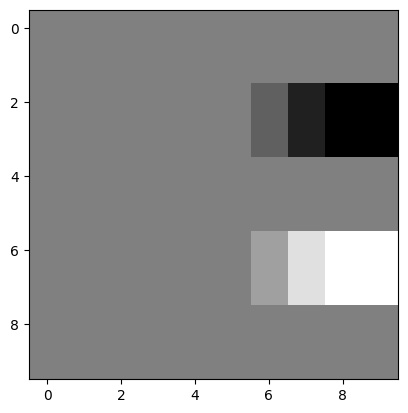

In [51]:
## after transpose filter --> sobel transpose
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

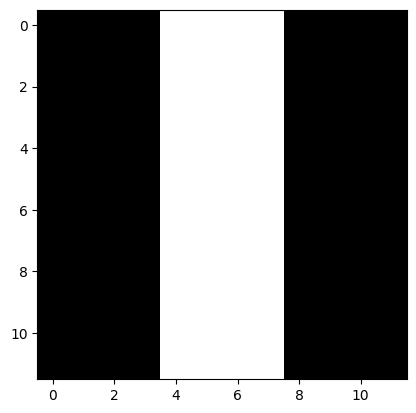

In [52]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

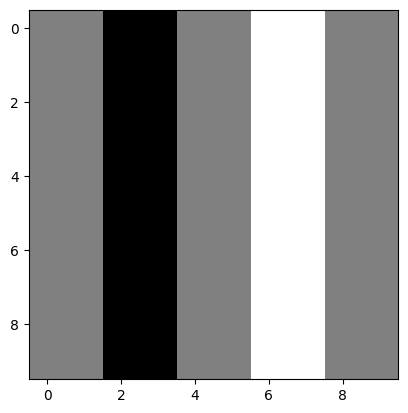

In [53]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

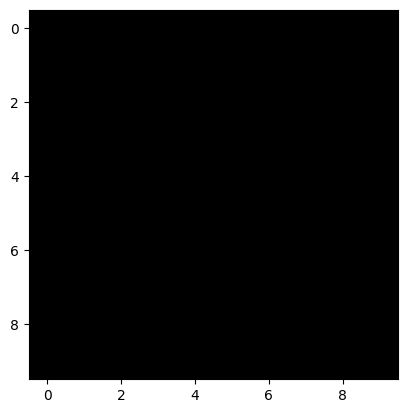

In [54]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

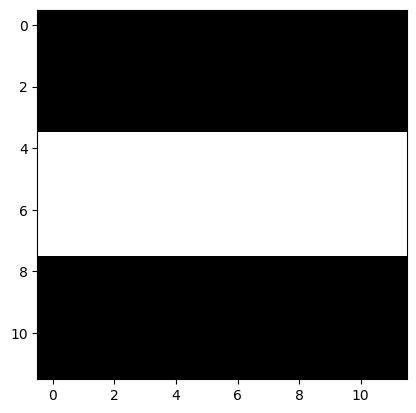

In [55]:

example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

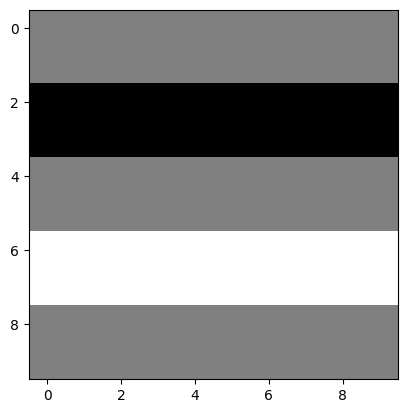

In [56]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

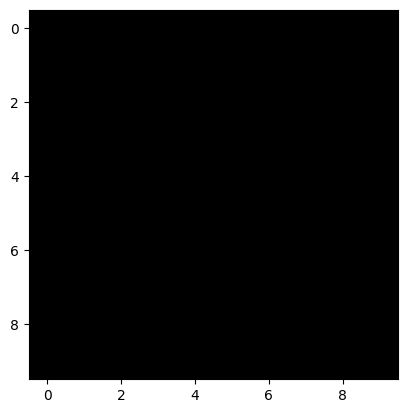

In [57]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

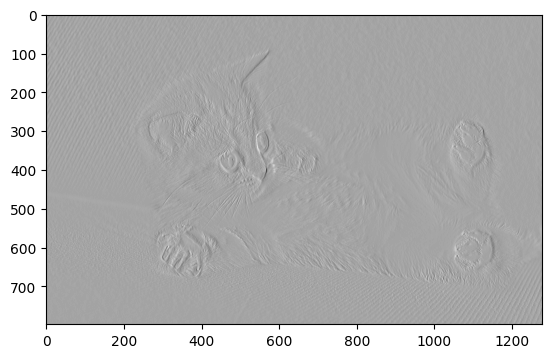

In [58]:
result = simple_conv(imgFilter=sobel, picture=cat_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

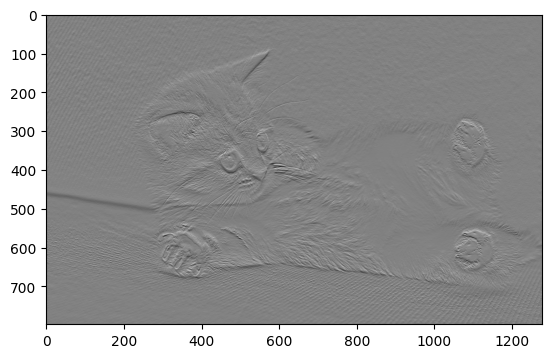

In [59]:
result = simple_conv(imgFilter=sobel.T, picture=cat_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [60]:
cat_cv2_BGR_GRAY.shape

(800, 1280)

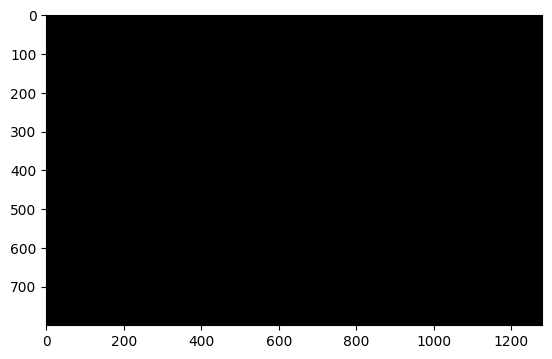

In [61]:
nothing = np.zeros(cat_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

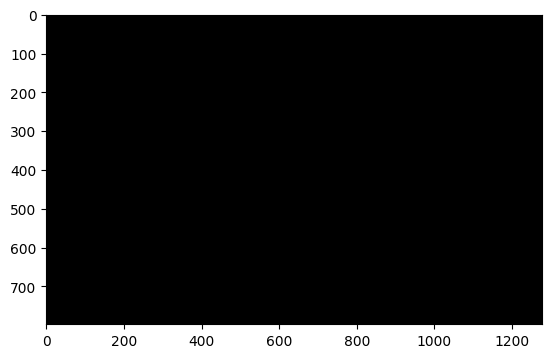

In [62]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

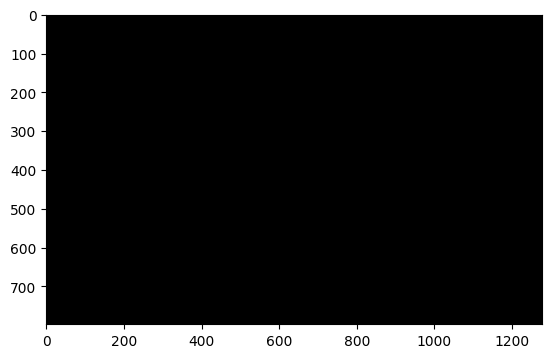

In [63]:
result = simple_conv(imgFilter=sobel, picture=nothing)
plt.imshow(result, cmap="gray")

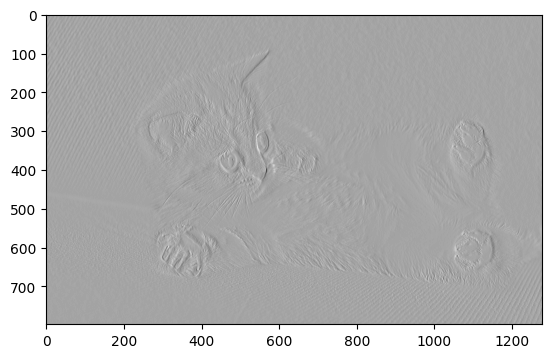

In [64]:
result = simple_conv(imgFilter=sobel, picture=cat_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [65]:
random_f = np.random.randn(3,3)
random_f

array([[ 0.48086044,  1.25468118, -0.48553127],
       [ 0.84566582, -0.80528969,  0.15427631],
       [-0.33482651,  0.37548378,  0.06976735]])

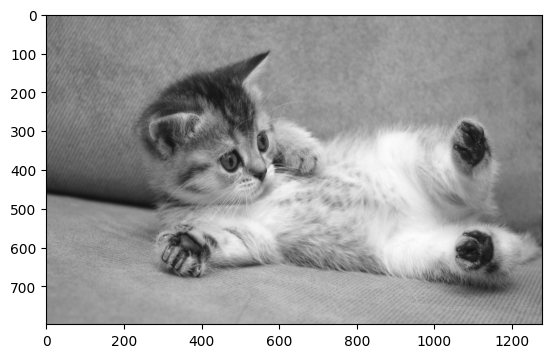

In [66]:
result = simple_conv(imgFilter=random_f, picture=cat_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")